# FEATURE SCALING
1. min max scaler
2. standard scaler
3.max Abs scaler
4.Robust Scaler
5.Quantile transform scaler
6.power transform scaler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\hp\Downloads\Air_Quality.csv')

In [4]:
df.head(6)

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0
5,6,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",CO,21-10-2021 01:00:00,15.0,45.0,32.0


# MIN MAX SCALING

In [45]:
min_max = df.iloc[[0,1,2,3,4,5],[7]]

<AxesSubplot:>

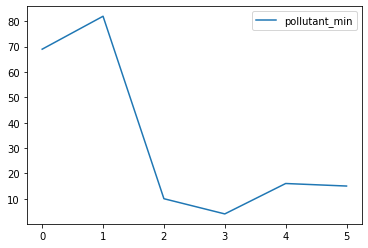

In [46]:
min_max.plot.line()

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [38]:
transform_min_max = scaler.fit_transform(min_max)

In [41]:
transform_min_max.shape

(5, 1)

In [26]:
transform_min_max = scaler.fit_transform(min_max)
transform_min_max = pd.DataFrame(transform_min_max)

In [42]:
transform_min_max = pd.DataFrame(transform_min_max)
transform_min_max

,0
0,1.000000
1,0.092308
2,0.000000
3,0.184615
4,0.169231


In [47]:
values = min_max.join(transform_min_max)

In [48]:
values.columns=['before scaling','ofter scaling']

In [52]:
values

,before scaling,ofter scaling
0,69.0,1.000000
1,82.0,0.092308
2,10.0,0.000000
3,4.0,0.184615
4,16.0,0.169231


<AxesSubplot:title={'center':'MIN_MAX SCALING'}>

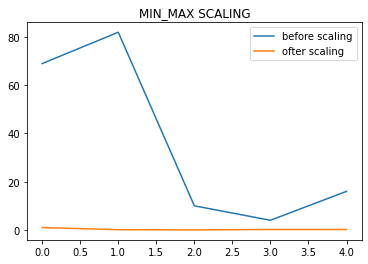

In [54]:
values.plot.line(title='MIN_MAX SCALING')

# Standard Scaler

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler1 = StandardScaler()

In [58]:
ssd = df.iloc[[0,1,2,3,4,5],[7]]

In [70]:
sscaler = scaler1.fit_transform(ssd)
sscaler = pd.DataFrame(sscaler)

Standard Diviation

In [68]:
sscaler.std()

0    1.095445
dtype: float64

In [73]:
sscaler = sscaler.join(ssd)

In [74]:
sscaler.columns=['ofter scaling','before scaling']

In [77]:
sscaler

,ofter scaling,before scaling
0,1.180952,69.0
1,1.603494,82.0
2,-0.736741,10.0
3,-0.931760,4.0
4,-0.541721,16.0
5,-0.574224,15.0


<AxesSubplot:title={'center':'STANDARD SCALER'}>

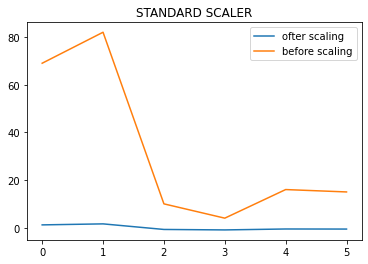

In [78]:
sscaler.plot.line(title='STANDARD SCALER')

# MAX ABS SCALER

In [88]:
from sklearn.preprocessing import MaxAbsScaler

In [89]:
MaxAbs = MaxAbsScaler()

In [90]:
MaxAbsScaler1= df.iloc[[0,1,2,3,4,5],[7]]
MaxAbsScaler1

,pollutant_min
0,69.0
1,82.0
2,10.0
3,4.0
4,16.0
5,15.0


In [93]:
MaxAbsScaler = MaxAbs.fit_transform(MaxAbsScaler1)
MaxAbsScaler = pd.DataFrame(MaxAbsScaler)

In [95]:
MaxAbsScaler = MaxAbsScaler.join(MaxAbsScaler1)

In [102]:
MaxAbsScaler.columns=['ofterscaling','before scaling']
MaxAbsScaler

,ofterscaling,before scaling
0,0.841463,69.0
1,1.000000,82.0
2,0.121951,10.0
3,0.048780,4.0
4,0.195122,16.0
5,0.182927,15.0


<AxesSubplot:title={'center':'MAX ABS SCALER'}>

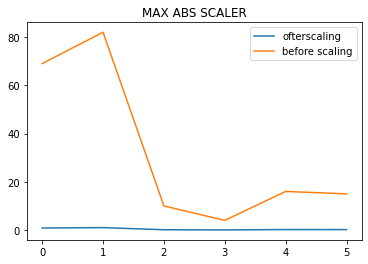

In [101]:
MaxAbsScaler.plot.line(title='MAX ABS SCALER')

# ROBUST SCALER

In [105]:
from sklearn.preprocessing import RobustScaler

In [106]:
Robust = RobustScaler()

In [107]:
data = df.iloc[[0,1,2,3,4,5],[7]]

In [110]:
robust = Robust.fit_transform(data)
robust = pd.DataFrame(robust)

In [112]:
robust = robust.join(data)

In [113]:
robust.columns=['ofterscaling','beforscaling']

<AxesSubplot:title={'center':'ROBUST SCALING'}>

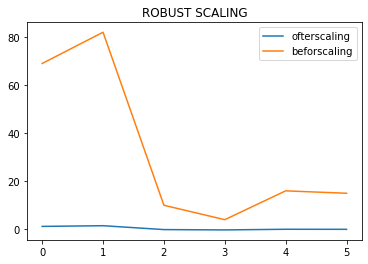

In [114]:
robust.plot.line(title='ROBUST SCALING')

# OUTLIER HANDLE STANDARDED SCALER AND ROBUST SCALER

In [172]:
m = df.iloc[[0,1,2,3,4,5],[7]]

In [173]:
m.iloc[0] = [150]

In [174]:
m.iloc[1]=[18]

In [175]:
m.reset_index(inplace =True)


In [176]:
m

,index,pollutant_min
0,0,150.0
1,1,18.0
2,2,10.0
3,3,4.0
4,4,16.0
5,5,15.0


<AxesSubplot:xlabel='index', ylabel='pollutant_min'>

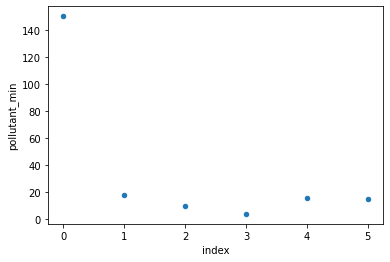

In [177]:
m.plot.scatter(x='index',y='pollutant_min')

In [202]:
stan = scaler1.fit_transform(m[['pollutant_min']])
stan = pd.DataFrame(stan)

In [211]:
stan = stan.reset_index()

In [212]:
stan.columns=['name','stanardscalr']
stan

,name,stanardscalr
0,0,2.227083
1,1,-0.340384
2,2,-0.495988
3,3,-0.612691
4,4,-0.379285
5,5,-0.398735


In [213]:
robust = Robust.fit_transform(m[['pollutant_min']])
robust = pd.DataFrame(robust)

In [215]:
robust = robust.reset_index()

In [216]:
robust.columns=['name','Robust Scalr']
robust

,name,Robust Scalr
0,0,21.52
1,1,0.40
2,2,-0.88
3,3,-1.84
4,4,0.08
5,5,-0.08


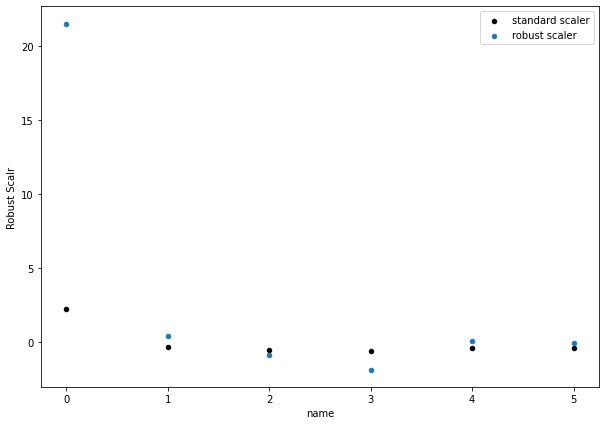

In [225]:
ax,legend=(['l1','l2'])
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
stan.plot.scatter(x='name',y='stanardscalr',ax=ax,color='black')
robust.plot.scatter(x='name',y='Robust Scalr',ax=ax)
ax.legend(['standard scaler','robust scaler'])

# Quantile Transformer scaler

In [230]:
from sklearn.preprocessing import QuantileTransformer

In [231]:
q = QuantileTransformer()

In [232]:
m

,index,pollutant_min
0,0,150.0
1,1,18.0
2,2,10.0
3,3,4.0
4,4,16.0
5,5,15.0


In [235]:
qu = q.fit_transform(m[['pollutant_min']])

C:\Users\hp\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (6). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [236]:
qu = pd.DataFrame(qu)

In [238]:
quntaile = m.join(qu)

In [239]:
quntaile.columns=['index','beforescale','ofterscale']

In [245]:
quantail = quntaile.drop('index',axis=1)

<AxesSubplot:title={'center':'Quantile transformer'}>

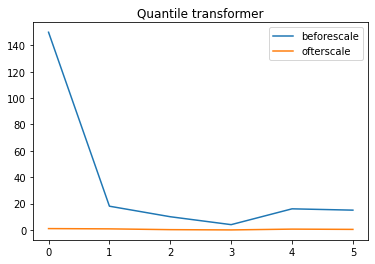

In [247]:
quantail.plot.line(title = 'Quantile transformer')

# POWER TRANSFORMER

In [248]:
from sklearn.preprocessing import PowerTransformer

1.Yeo-johnson

In [250]:
power =PowerTransformer(method='yeo-johnson')

In [253]:
m=m.drop('index',axis=1)

In [254]:
m

,pollutant_min
0,150.0
1,18.0
2,10.0
3,4.0
4,16.0
5,15.0


In [256]:
powertrans = power.fit_transform(m)

In [257]:
powertrans = pd.DataFrame(powertrans)

In [258]:
powertrans = powertrans.join(m)

In [259]:
powertrans.columns=['ofter jeo-john','befor yeo-jhn']

<AxesSubplot:title={'center':'Power transform--jeo-john'}>

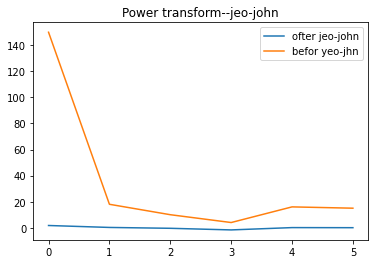

In [261]:
powertrans.plot.line(title = 'Power transform--jeo-john')

2.box-cox

In [262]:
power1 =PowerTransformer(method='box-cox')

In [263]:
m

,pollutant_min
0,150.0
1,18.0
2,10.0
3,4.0
4,16.0
5,15.0


In [264]:
powercox = power1.fit_transform(m)

In [268]:
powercox = pd.DataFrame(powercox)
powercox = powercox.join(m)

In [269]:
powercox.columns=['oftercoxbox','before coxbox']

<AxesSubplot:title={'center':'COX-BOX transform'}>

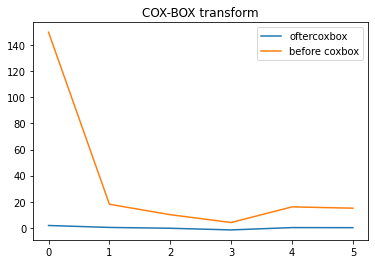

In [270]:
powercox.plot.line(title='COX-BOX transform')